In [23]:
import numpy as np 
import matplotlib.pyplot as plt

#### Creating Dataset
A simple dataset using numpy arrays

In [24]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

#### View the data
There seems to be some relationship which can be plotted between x_train and y_train. A regression line can be drawn to represent the relationship

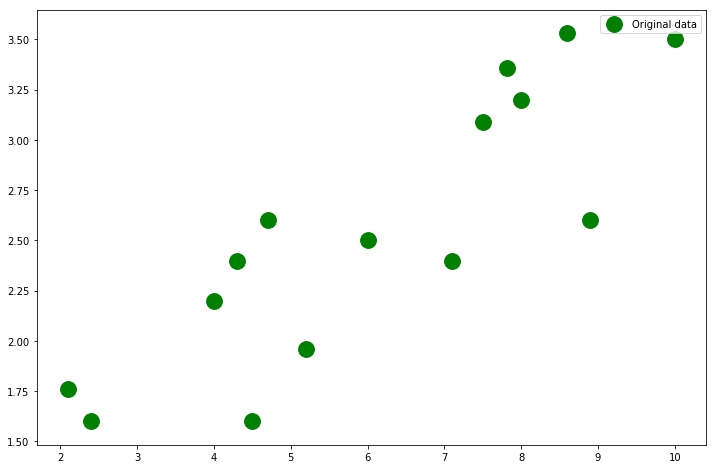

In [26]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [27]:
import torch 

#### Converting data to pytorch tensors
By defualt requires_grad = False

In [73]:
X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


#### Set the details for our neural network
Input, output and hidden layer sizes plus the learning rate

In [74]:
input_size = 1 
hidden_size = 1
output_size = 1

#### Create random Tensors for weights.<br>
Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

In [75]:
w1 = torch.rand(input_size, 
                hidden_size, 
                
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [76]:
w2 = torch.rand(hidden_size, 
                output_size, 
                
                requires_grad=True)
w2.shape

torch.Size([1, 1])

## Training

#### Foward Pass:
* Predicting Y with input data X
* finding (matrix X matrix) using .mm function, finding product of X_train and w1 and activation function is identity function
* again doing mat product data with second weight w2

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss 


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
* After this call w1.grad and w2.grad will be Tensors holding the gradient of the loss with respect to w1 and w2 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [77]:
learning_rate = 1e-6

In [78]:
# Start at 10. Change this to 100, 1000 and 3000 and run the code all the way to the plot at the bottom
for iter in range(1, 10):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

In [79]:
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.3358]], requires_grad=True)
w2:  tensor([[0.3698]], requires_grad=True)


#### Checking the output

Converting data into a tensor

In [80]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

#### Get the predicted values using the weights 
Using final weights calculated from our training in order to get the predicted values

In [81]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[0.5836],
        [0.2980],
        [0.9313],
        [0.8816],
        [0.5339],
        [0.9705],
        [1.1051],
        [0.6457],
        [1.0666],
        [0.2608],
        [0.9934],
        [1.2417],
        [0.5588],
        [0.7450],
        [0.4967]], grad_fn=<MmBackward>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [82]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[0.58360565],
       [0.29801142],
       [0.9312856 ],
       [0.88161707],
       [0.5339371 ],
       [0.97052383],
       [1.1051255 ],
       [0.64569134],
       [1.0666325 ],
       [0.26075998],
       [0.99337137],
       [1.2417141 ],
       [0.5587714 ],
       [0.74502856],
       [0.49668568]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

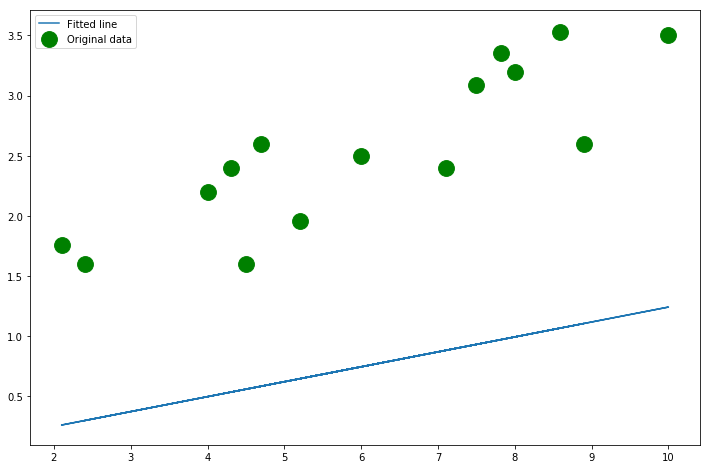

In [83]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g') 

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()